# Making Plots Using `Matplotlib`

`matplotlib` is a Python plotting package that has similar features to Matlab

Website: https://matplotlib.org/

This notebook will demonstrate some of the features of `matplotlib` common for Climate Data Analysis plotting, including:

1. How to make a line plot and make it look nice with labels and colors
2. How to make multiple plots together using subplot

## Data

We will use data on the COLA Servers from SubX in which I have previously calculated the daily skill of the Real-time Multivariate MJO Index (RMM), two indices that together represent the Madden-Julian Oscillation, for many different SubX models.  

The data are located on the COLA Servers in the directory:
```/project/predictability/kpegion/subx/data/analysis/skill/```

The files are called:
```skill.accrmse.MODELNAME.rmm.daily.nc```

where MODELNAME refers to one of the SubX models

In [1]:
import warnings

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_model_name(fname):
    return modelname

Set the directory and filename

In [3]:
path='/project/predictability/kpegion/subx/data/analysis/skill/'
fname='skill.accrmse.*.rmm.daily.nc'

Read in the data for all models using `xr.open_mfdataset()`

In [4]:
rmm_ds=xr.open_mfdataset(path+fname,concat_dim='model',combine='nested')

As you can see, we now have a bunch of skill scores for each model. We will focus on bivarcorr, which is the bivariate correlation and is commonly used to measure the skill of the RMM indices combined into a single measure. 

You may also notice that we have only 1 latitude and 1 longitude, as this is only an skill score for an index.  Thus, we can use the `squeeze` function to drop these unimportant dimensions.

In [5]:
rmm_ds=rmm_ds.squeeze()
rmm_ds

<xarray.Dataset>
Dimensions:    (model: 6, time: 45)
Coordinates:
    lat        float32 -90.0
    lon        float32 0.0
  * time       (time) datetime64[ns] 1960-01-02 1960-01-03 ... 1960-02-15
Dimensions without coordinates: model
Data variables:
    accrmm1    (model, time) float32 dask.array<chunksize=(1, 45), meta=np.ndarray>
    accrmm2    (model, time) float32 dask.array<chunksize=(1, 45), meta=np.ndarray>
    rmsermm1   (model, time) float32 dask.array<chunksize=(1, 45), meta=np.ndarray>
    rmsermm2   (model, time) float32 dask.array<chunksize=(1, 45), meta=np.ndarray>
    bivarcorr  (model, time) float32 dask.array<chunksize=(1, 45), meta=np.ndarray>
    bivarrmse  (model, time) float32 dask.array<chunksize=(1, 45), meta=np.ndarray>
    perr       (model, time) float32 dask.array<chunksize=(1, 45), meta=np.ndarray>
    aerr       (model, time) float32 dask.array<chunksize=(1, 45), meta=np.ndarray>
Attributes:
    title:         SubX Anomalies
    long_title:    SubX Anomalies
    comments:      SubX project http://cola.gmu.edu/~kpegion/subx/
    institution:   IRI
    source:        SubX IRI
    CreationDate:  2018/09/12 17:50:23
    CreatedBy:     kpegion
    MatlabSource:  calcdailyskilltest

As you can see, the dimensiion model exists, but has no definition. Our `xr.Dataset` does not know the model names, but we can add them.

In [6]:
modelnames=['CCSM4-RSMAS','FIMr1p1-ESRL','GEFS-EMC','GEM-ECCC',
            'GEOS_V2p1-GMAO','NESM-NRL']
rmm_ds['model']=modelnames
rmm_ds

<xarray.Dataset>
Dimensions:    (model: 6, time: 45)
Coordinates:
    lat        float32 -90.0
    lon        float32 0.0
  * time       (time) datetime64[ns] 1960-01-02 1960-01-03 ... 1960-02-15
  * model      (model) <U14 'CCSM4-RSMAS' 'FIMr1p1-ESRL' ... 'NESM-NRL'
Data variables:
    accrmm1    (model, time) float32 dask.array<chunksize=(1, 45), meta=np.ndarray>
    accrmm2    (model, time) float32 dask.array<chunksize=(1, 45), meta=np.ndarray>
    rmsermm1   (model, time) float32 dask.array<chunksize=(1, 45), meta=np.ndarray>
    rmsermm2   (model, time) float32 dask.array<chunksize=(1, 45), meta=np.ndarray>
    bivarcorr  (model, time) float32 dask.array<chunksize=(1, 45), meta=np.ndarray>
    bivarrmse  (model, time) float32 dask.array<chunksize=(1, 45), meta=np.ndarray>
    perr       (model, time) float32 dask.array<chunksize=(1, 45), meta=np.ndarray>
    aerr       (model, time) float32 dask.array<chunksize=(1, 45), meta=np.ndarray>
Attributes:
    title:         SubX Anomalies
    long_title:    SubX Anomalies
    comments:      SubX project http://cola.gmu.edu/~kpegion/subx/
    institution:   IRI
    source:        SubX IRI
    CreationDate:  2018/09/12 17:50:23
    CreatedBy:     kpegion
    MatlabSource:  calcdailyskilltest

Now we will plot the skill of the first model for all lead times as a line plot

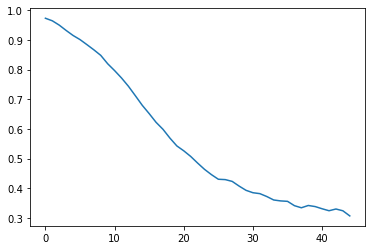

In [7]:
plt.plot(rmm_ds['bivarcorr'][0,:])

## Axis Labels and Title

Text(0, 0.5, 'Bivariate Anomaly Correlation')

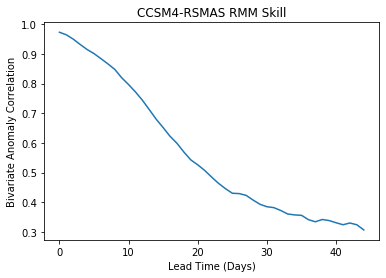

In [8]:
plt.plot(rmm_ds['bivarcorr'][0,:])
plt.title(modelnames[0]+' RMM Skill')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Bivariate Anomaly Correlation')

## Controlling the Axis intervals

You can control the axis intervals by specifying them in `plt.xticks` or `plt.yticks`

([<matplotlib.axis.YTick at 0x7f8330ac3710>,
 <a list of 10 Text yticklabel objects>)

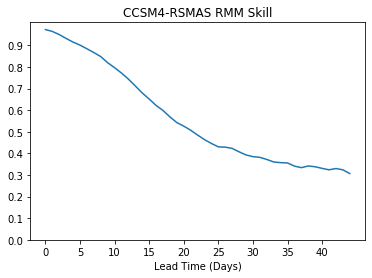

In [9]:
x=np.arange(0,45,5)
y=np.arange(0,1,0.1)
plt.plot(rmm_ds['bivarcorr'][0,:])
plt.title(modelnames[0]+' RMM Skill')
plt.xlabel('Lead Time (Days)')
plt.xticks(x)
plt.yticks(y)

## Change color and thickness, add horizontal line

([<matplotlib.axis.YTick at 0x7f8330d3f940>,
 <a list of 10 Text yticklabel objects>)

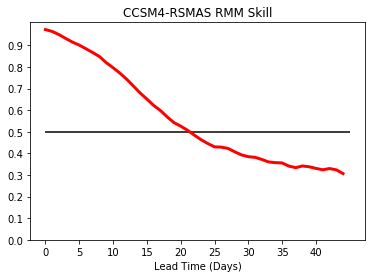

In [10]:
x=np.arange(0,45,5)
y=np.arange(0,1,0.1)
plt.plot(rmm_ds['bivarcorr'][0,:],color='r',linewidth=3.0)
plt.hlines(0.5,0,45)
plt.title(modelnames[0]+' RMM Skill')
plt.xlabel('Lead Time (Days)')
plt.xticks(x)
plt.yticks(y)

## Multiple lines on the same plot with legend

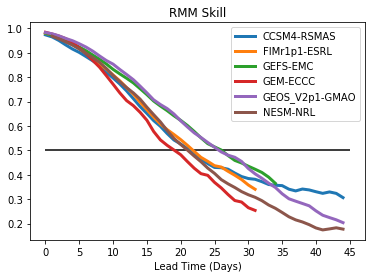

In [11]:
# Loop over all the models and plot
for i,model in enumerate(rmm_ds['model'].values):
    x=np.arange(0,46,5)
    y=np.arange(0,1.1,0.1)
    plt.plot(rmm_ds['bivarcorr'][i,:],linewidth=3.0)
    plt.xticks(x)
    plt.yticks(y)

# Add labels, legend, hline
plt.title('RMM Skill')
plt.xlabel('Lead Time (Days)')
plt.legend(modelnames)
plt.hlines(0.5,0,45)

## Multiple plots on a page 

We will loop over all the models and make an individual plot for each model, with all plots being on the same page.  We will make use of the `plt.subplot` function in which you specify `plt.subplot(#rows,#columns, plot#)`, which defines a grid of subplots on the page. The plots are thenfilled across rows first, then columns to fill out the grid. 

Here is an example using our RMM skill for all the models.  In this case, we have specified then number of rows and columns manually to make it easy to understand, but this could easily be generaized

In [12]:
# We have 6 models to plot, so we will specify 3 rows x 2 columns
nrows=3
ncols=2

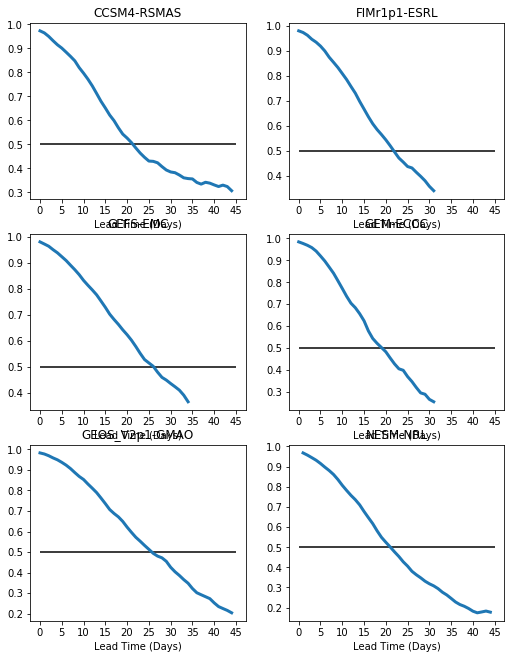

In [13]:
# Define the figure size for a 
#portrait 8.5 x 11 in page (e.g. like for a paper)
plt.figure(figsize=(8.5,11))

# Loop over all models and plot
for i,model in enumerate(rmm_ds['model'].values):
    plt.subplot(nrows,ncols,i+1)
    x=np.arange(0,46,5)
    y=np.arange(0,1.1,0.1)
    plt.plot(rmm_ds['bivarcorr'][i,:],linewidth=3.0)
    plt.xticks(x)
    plt.yticks(y)
    plt.title(model)
    plt.xlabel('Lead Time (Days)')
    plt.hlines(0.5,0,45)

There are two problems with this plot:
1. We have overlap between the titles and the xaxis labels.  We will fix this using `plt.tight_layout()`
2. The plots have different ranges for the y-axis.  We will fix this using `plt.ylim()`

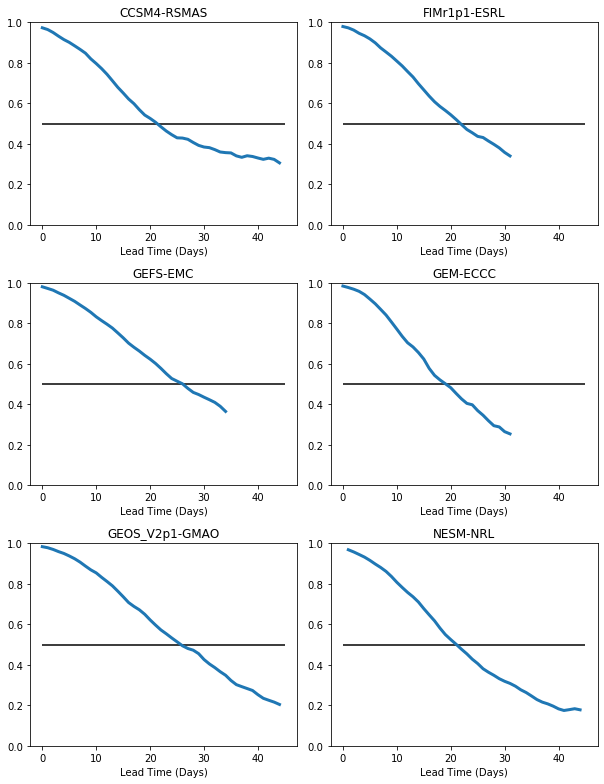

In [14]:
# Define the figure size for a 
#portrait 8.5 x 11 in page (e.g. like for a paper)
plt.figure(figsize=(8.5,11))

# Loop over all models and plot
for i,model in enumerate(rmm_ds['model'].values):
    plt.subplot(nrows,ncols,i+1)
    plt.ylim(0,1.0)
    x=np.arange(0,45,5)
    y=np.arange(0,1,0.1)
    plt.plot(rmm_ds['bivarcorr'][i,:],linewidth=3.0)
    x=np.arange(0,46,5)
    y=np.arange(0,1.1,0.1)
    plt.title(model)
    plt.xlabel('Lead Time (Days)')
    plt.hlines(0.5,0,45)
    plt.tight_layout()